<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.859 · Visualización de datos · PEC2</p>
<p style="margin: 0; text-align:right;">2024-2 · Máster universitario en Ciencia de datos (Data science)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
<strong>Nombre:</strong>
    <strong>Carlos Alberto Agudelo Moncada</strong>
</div>

**Descripción:** 


El presente notebook genera un **Bullet Graph** a partir de un dataset que se denomina **actual_vs_target_data** y que se encuentra en https://www.kaggle.com/datasets/mithilesh9/target-vs-actual-profit-achieved-by-product?select=actual_vs_target_data.csv

**Acerca de Dataset:**

Este conjunto de datos proviene del **Proyecto Target vs Actual Profit achieved by Product** que contiene un dataset con los datos de beneficios generados y beneficios objetivos de unos productos en diferentes estados de Estados Unidos.

Tomaremos como referencia para la generación del **Bullet Graph** los datos de utilidad del año 2020 en los estados de California, Texas y Florida, con el fin de identificar y responder si los productos ofrecidos cumplen con los objetivos de negocio establecidos previamente para el conjunto de estos 3 estados.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# Cargamos el dataset
df = pd.read_csv("actual_vs_target_data.csv")


In [3]:
# Convertimos 'date' a formato fecha y extraer el año
df['date'] = pd.to_datetime(df['date'], dayfirst=True)  # porque es día/mes/año
df['year'] = df['date'].dt.year

# Filtramos por año 2020 y estados específicos
estados = ['California', 'Texas', 'Florida']
df_2020 = df[(df['year'] == 2020) & (df['state'].isin(estados))]

In [4]:
# Agrupamos por producto
grouped = df_2020.groupby('product').agg({
    'profit': 'sum',
    'target_profit': 'sum'
}).reset_index()

In [5]:
# Ordenamos por target_profit para mejor visualización
grouped = grouped.sort_values(by='target_profit', ascending=True).reset_index(drop=True)

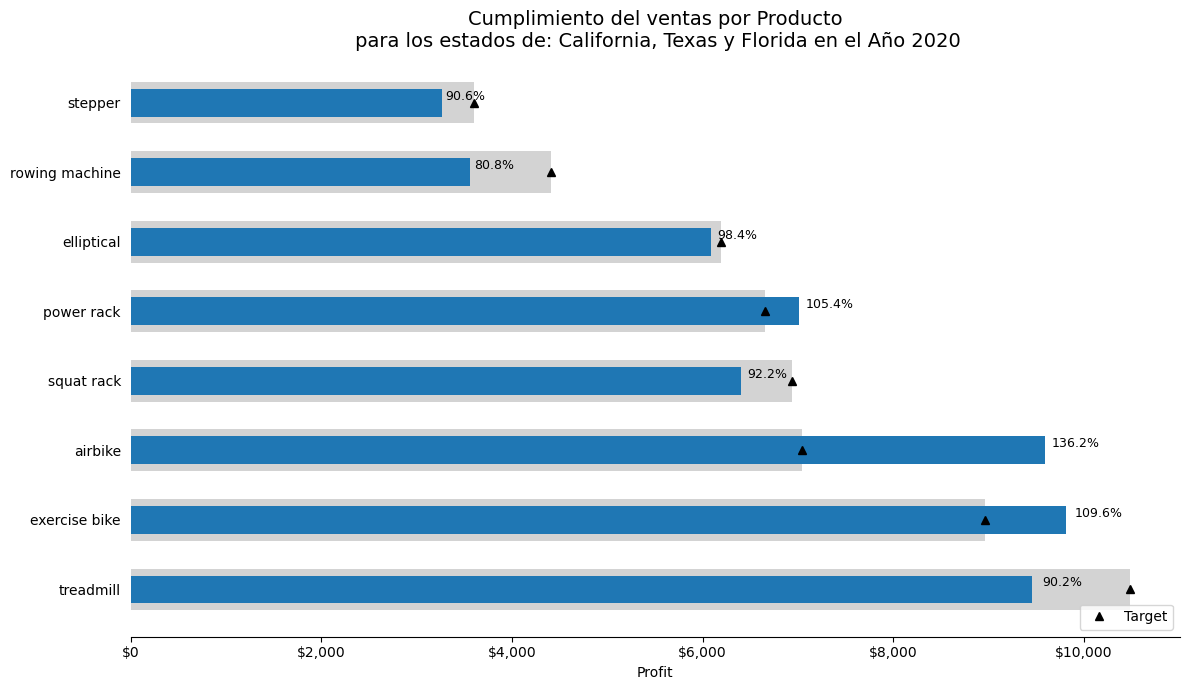

In [6]:
# Creamos Bullet Graph por producto
fig, ax = plt.subplots(figsize=(12, 7))

for i, row in grouped.iterrows():
    # Calcular porcentaje de cumplimiento
    porcentaje = (row['profit'] / row['target_profit']) * 100 if row['target_profit'] > 0 else 0
    
    # Fondo (target)
    ax.barh(i, row['target_profit'], color='#d3d3d3', height=0.6)
    # Barra actual (profit)
    ax.barh(i, row['profit'], color='#1f77b4', height=0.4)
    # Indicador de target
    ax.plot(row['target_profit'], i, 'k^', label='Target' if i == 0 else "")
    # Etiqueta con porcentaje
    ax.text(row['profit'] + (row['target_profit'] * 0.01), i,
            f"{porcentaje:.1f}%", va='bottom', fontsize=9, color='black')

# Ejes y estilo
ax.set_yticks(range(len(grouped)))
ax.set_yticklabels(grouped['product'])
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.set_xlabel('Profit')
ax.set_title('Cumplimiento del ventas por Producto\n para los estados de: California, Texas y Florida en el Año 2020', fontsize=14)
ax.legend(loc='lower right')

# Limpieza del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False)

plt.tight_layout()
plt.show()
